In [ ]:
from dotenv import load_dotenv
import os

In [1]:
# import pandas as pd
import modin.pandas as pd
import ray
ray.init()

2025-02-23 12:40:26,378	INFO worker.py:1841 -- Started a local Ray instance.


Python version:,3.11.9
Ray version:,2.42.1


In [ ]:
ray.shutdown()

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None 
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar del dataset

## API

In [ ]:
from sodapy import Socrata

In [ ]:
_ = load_dotenv()
app_token = os.getenv("TOKEN")

In [ ]:
dataset_id = "kgxf-xxbe"
total_records = 7109704

In [ ]:
limit = 7000
offset = 0
results = []

In [ ]:
# Load client 
client = Socrata("www.datos.gov.co", app_token)


In [ ]:
while offset < total_records:
    print(f"Downloading records {offset} to {offset + limit}. {offset/total_records*100:.2f}% complete.")
    results += client.get(dataset_id, limit=limit, offset=offset)
    offset += limit

In [ ]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

## API REST

In [ ]:
url = "https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-11/kgxf-xxbe/data_preview"

## Achivo csv

In [4]:
# Ruta del archivo
path_csv_file = "C:\\Users\\User\\Documents\\Prueba Tecser&Cloud\\Resultados__nicos_Saber_11_20250221.csv"

In [57]:
# Se define el diccionario de tipos de datos
dtypes = {
'PERIODO':"str",
'COLE_COD_DANE_ESTABLECIMIENTO':"str",
'COLE_COD_DANE_SEDE':"str",
'COLE_COD_DEPTO_UBICACION':"str",
'COLE_COD_MCPIO_UBICACION':"str",
'COLE_CODIGO_ICFES':"str",
'ESTU_COD_DEPTO_PRESENTACION':"str",
'ESTU_COD_MCPIO_PRESENTACION':"str",
'ESTU_COD_RESIDE_DEPTO':"str",
'ESTU_COD_RESIDE_MCPIO':"str",
'ESTU_FECHANACIMIENTO':"str",
# 'PUNT_INGLES':"float64",
# 'PUNT_MATEMATICAS':"float64",
# 'PUNT_SOCIALES_CIUDADANAS':"float64",
# 'PUNT_C_NATURALES':"float64",
# 'PUNT_LECTURA_CRITICA':"float64",
# 'PUNT_GLOBAL':"float64",
}

In [ ]:
# Se carga el archivo
saber11 = pd.read_csv(path_csv_file, low_memory=False, dtype=dtypes)

In [90]:
data = saber11.copy()

# Procesamiento y limpia de datos

In [91]:
data.head()

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_CODIGO_ICFES,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_NACIONALIDAD,ESTU_PAIS_RESIDE,ESTU_PRIVADO_LIBERTAD,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,311848000812,311848000812,11,11001,022574,BOGOTA,FEMENINO,COMPLETA,BOGOTÁ D.C.,NO OFICIAL,GIMN FEMENINO,GIMN FEMENINO,S,11,11001,11,11001,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,08/08/1994,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Cuatro,Educación profesional completa,Educación profesional completa,Estrato 6,Cuatro,Si,Si,Si,Si,B+,94,88,NaN,NaN,NaN,NaN
1,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70.00,65.00,69.00,339.00
2,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70.00,65.00,69.00,339.00
3,20122,TI,SB11201220204399,URBANO,N,A,TÉCNICO/ACADÉMICO,163130000718,163130000718,63,63130,013029,QUINDIO,MIXTO,MAÑANA,CALARCÁ,OFICIAL,INSTITUCION EDUCATIVA ANTONIO NARIÑO,ANTONIO NARIÑO,S,63,63130,63,63130,QUINDIO,QUINDIO,PUBLICAR,ESTUDIANTE,20/05/1996,F,CALARCÁ,CALARCÁ,COLOMBIA,COLOMBIA,N,Dos,Secundaria (Bachillerato) incompleta,No sabe,Estrato 1,Cuatro,No,Si,Si,No,A1,48,45,NaN,NaN,NaN,NaN
4,20132,TI,SB11201320464198,URBANO,N,A,TÉCNICO,119001000559,119001000559,19,19001,046391,CAUCA,FEMENINO,MAÑANA,POPAYÁN,OFICIAL,CRISTO REY,SEDE CRISTO REY,S,19,19001,19,19001,CAUCA,CAUCA,PUBLICAR,ESTUDIANTE,19/03/1997,F,POPAYÁN,POPAYÁN,COLOMBIA,COLOMBIA,N,Cinco,Educación profesional completa,Educación profesional incompleta,Estrato 2,Ocho,No,Si,Si,Si,A-,43,52,NaN,NaN,NaN,NaN


In [8]:
print(f"Filas: {data.shape[0]}")
print(f"Columnas: {data.shape[1]}")

Filas: 7109704
Columnas: 51


In [9]:
cuenta_periodos = data['PERIODO'].value_counts().sort_index().reset_index()
cuenta_periodos.columns = ['Periodo', 'Cuenta']

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


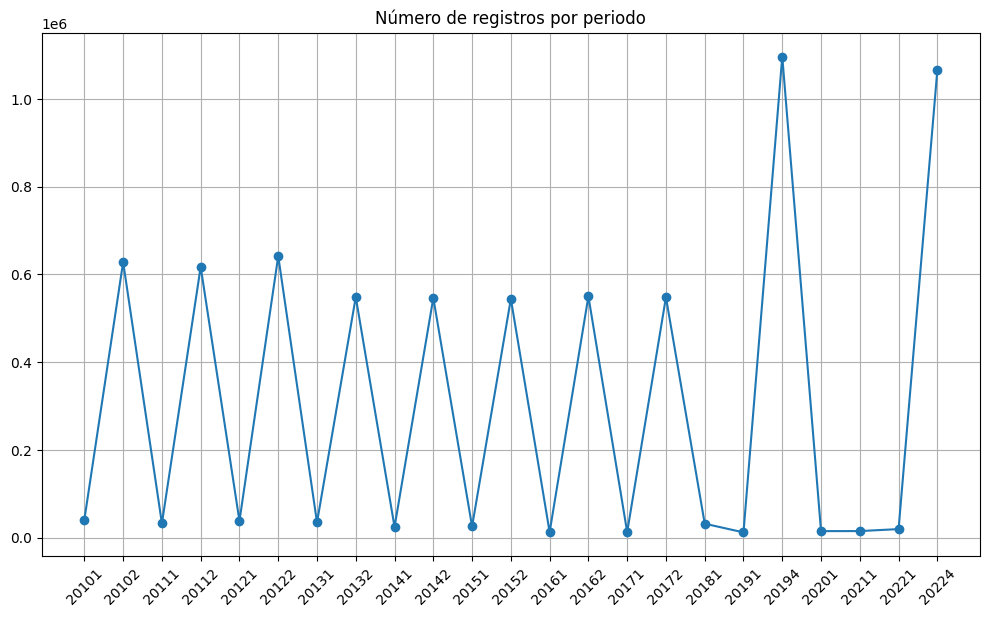

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cuenta_periodos["Periodo"],
        cuenta_periodos["Cuenta"], 
        marker="o",
        )
ax.set_title("Número de registros por periodo")
fig.tight_layout()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [92]:
data["Año"] = data["PERIODO"].str[:4].astype(int)

In [12]:
cuenta_años = data["Año"].value_counts().sort_index().reset_index()
cuenta_años.columns = ["Año", "Cuenta"]

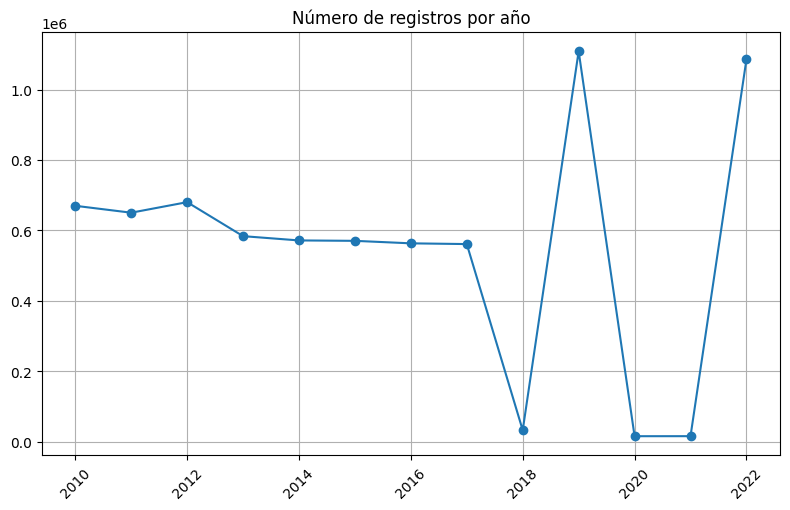

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(cuenta_años["Año"],
        cuenta_años["Cuenta"], 
        marker="o",
        )
ax.set_title("Número de registros por año")
fig.tight_layout()
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Estimación años

In [14]:
X = cuenta_años.loc[:7, "Año"].values.reshape(-1, 1)
y = cuenta_años.loc[:7, "Cuenta"].values.reshape(-1, 1)

In [17]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

LinearRegression()

In [21]:
y_pred = modelo.predict(np.array([2017, 2018, 2019]).reshape(-1, 1))
y_pred

array([[542323.        ],
       [524009.17857143],
       [505695.35714286]])

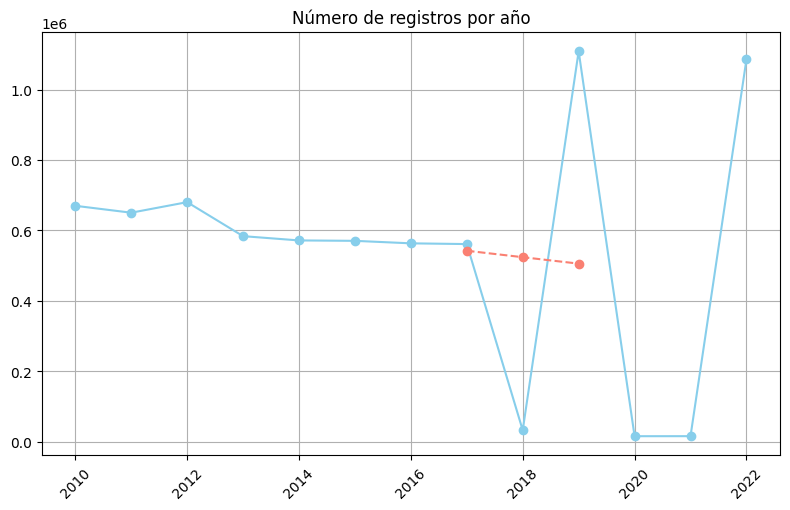

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(cuenta_años["Año"],
        cuenta_años["Cuenta"], 
        marker="o",
        color="skyblue",
        )
ax.plot([2017, 2018, 2019], 
        y_pred, 
        color="salmon", 
        marker="o",
        linestyle="--",
        )
ax.set_title("Número de registros por año")
fig.tight_layout()
plt.grid()
plt.xticks(rotation=45)
plt.show()

### ¿Qué pasa en el 2018 y en los años siguientes?

In [25]:
cuenta_periodo_2018_2022 = data.loc[data["Año"] >= 2018, "Año"].value_counts().sort_index().reset_index()

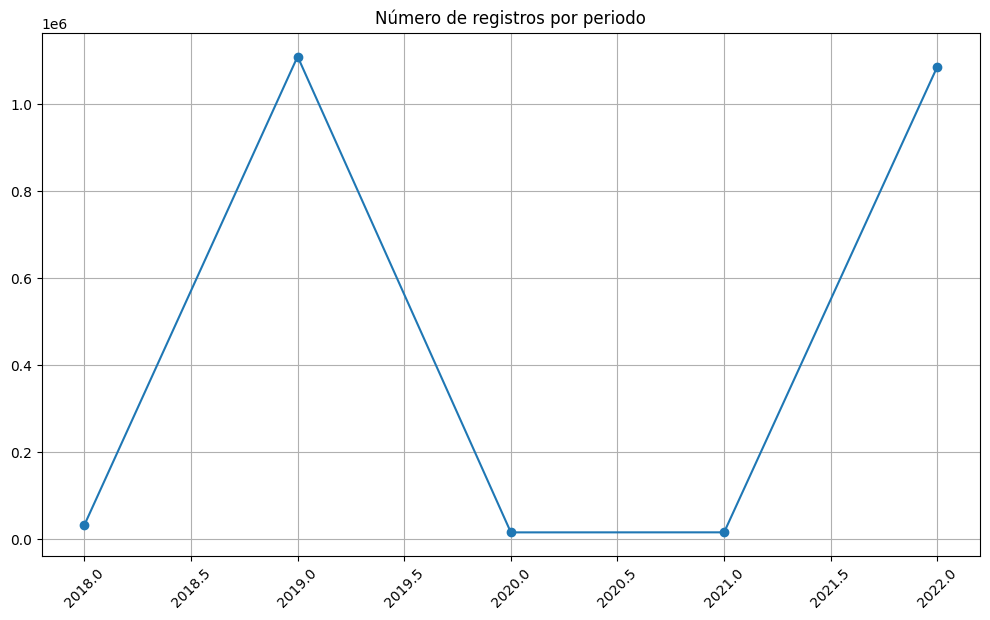

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cuenta_periodo_2018_2022["Año"],
        cuenta_periodo_2018_2022["count"], marker="o")
ax.set_title("Número de registros por periodo")
fig.tight_layout()

plt.grid()
plt.xticks(rotation=45)
plt.show()

**Conclusión:** Validando la información de los periodos posteriores al 2017 (2018 en adelante) con otro [dataset](https://medata.gov.co/dataset/1-011-08-000075) que contienen información acerca de las pruebas saber 11, se observa que la información consignada en el dataset, en las columnas *PERIODO* y *ESTU_CONSECUTIVO* no es congruente.

# EDA

In [98]:
# Separar columnas por tipo
cole_cols = [col for col in data.columns if "cole" in col.lower() and not "cod" in col.lower()]
estu_cols = [col for col in data.columns if "estu" in col.lower() and not "cod" in col.lower()]
fami_cols = [col for col in data.columns if "fami" in col.lower() and not "cod" in col.lower()]
punt_cols = [col for col in data.columns if "punt" in col.lower() and not "cod" in col.lower()]
ing_cols = [col for col in data.columns if "ingles" in col.lower() and not "cod" in col.lower()]
cods_cols = [col for col in data.columns if "cod" in col.lower()]

¿Los resultados globales han mejorado en el transcurso de 12 años?

In [28]:
print("Datos faltantes en columnas de puntajes")
(100 * data[punt_cols].isna().sum() / data.shape[0]).apply(lambda x: f"{x:.2f}%")

Datos faltantes en columnas de puntajes


PUNT_INGLES                  0.06%
PUNT_MATEMATICAS             0.00%
PUNT_SOCIALES_CIUDADANAS    36.70%
PUNT_C_NATURALES            36.70%
PUNT_LECTURA_CRITICA        36.70%
PUNT_GLOBAL                 36.70%
dtype: object

In [37]:
for materia in punt_cols:
    print(f"Materia: {materia}")
    for year in range(2010, 2023):
        print(f"Año: {year}", end=" ")
        print("datos nulos:", end=" ")
        print(f"{100 * data.loc[data['Año'] == year, materia].isna().sum() / data.loc[data['Año'] == year, materia].shape[0]:.2f}%")
    print("#"*30)

Materia: PUNT_INGLES
Año: 2010 datos nulos: 0.00%
Año: 2011 datos nulos: 0.00%
Año: 2012 datos nulos: 0.00%
Año: 2013 datos nulos: 0.00%
Año: 2014 datos nulos: 0.00%
Año: 2015 datos nulos: 0.00%
Año: 2016 datos nulos: 0.00%
Año: 2017 datos nulos: 0.00%
Año: 2018 datos nulos: 0.00%
Año: 2019 datos nulos: 0.00%
Año: 2020 datos nulos: 0.23%
Año: 2021 datos nulos: 0.30%
Año: 2022 datos nulos: 0.37%
##############################
Materia: PUNT_MATEMATICAS
Año: 2010 datos nulos: 0.00%
Año: 2011 datos nulos: 0.00%
Año: 2012 datos nulos: 0.00%
Año: 2013 datos nulos: 0.00%
Año: 2014 datos nulos: 0.00%
Año: 2015 datos nulos: 0.00%
Año: 2016 datos nulos: 0.00%
Año: 2017 datos nulos: 0.00%
Año: 2018 datos nulos: 0.00%
Año: 2019 datos nulos: 0.00%
Año: 2020 datos nulos: 0.00%
Año: 2021 datos nulos: 0.00%
Año: 2022 datos nulos: 0.00%
##############################
Materia: PUNT_SOCIALES_CIUDADANAS
Año: 2010 datos nulos: 100.00%
Año: 2011 datos nulos: 100.00%
Año: 2012 datos nulos: 100.00%
Año: 2013 

In [100]:
data[punt_cols] = data[punt_cols].astype(str).map(lambda x: x.replace(",", ".")).astype(float)

In [106]:
resumen_materias = dict()
for materia in punt_cols:
    print(f"Materia: {materia}")
    resumen_año = dict()
    for year in range(2010, 2023):
        resumen_año[year] = data.loc[data["Año"] == year, materia].describe()
    resumen_materias[materia] = resumen_año
    print("#"*30)
        

Materia: PUNT_INGLES
##############################
Materia: PUNT_MATEMATICAS
##############################
Materia: PUNT_SOCIALES_CIUDADANAS
##############################
Materia: PUNT_C_NATURALES
##############################
Materia: PUNT_LECTURA_CRITICA
##############################
Materia: PUNT_GLOBAL
##############################


In [141]:
df = pd.DataFrame(resumen_materias["PUNT_GLOBAL"]).T
df["inf_RQI"] =  df["50%"] - 1.5 * (df["75%"] - df["25%"])
df["sup_RQI"] =  df["50%"] + 1.5 * (df["75%"] - df["25%"])
df["inf_std"] =  df["mean"] - df["std"]
df["sup_std"] =  df["mean"] + df["std"]


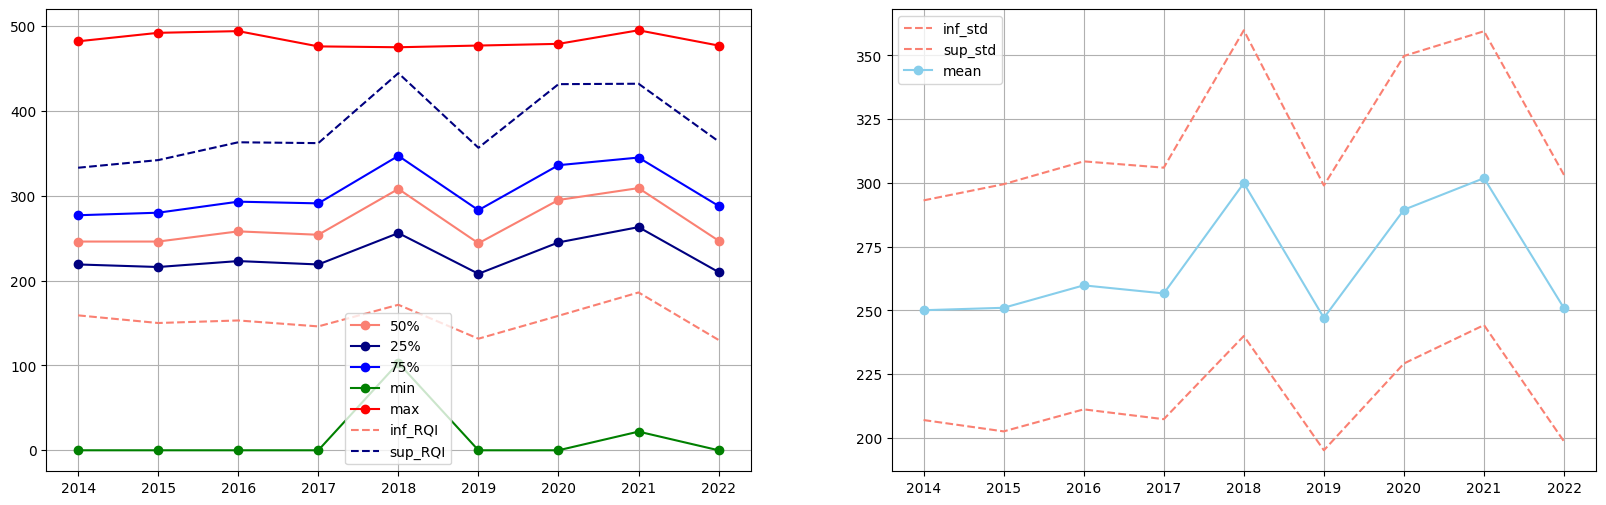

In [145]:

fig, ax = plt.subplots(1,2, figsize=(20, 6))

for label, color in [("50%", "salmon"), ("25%", "navy"), ("75%", "blue"), ("min", "green"), ("max", "red")]:
    ax[0].plot(df.index, 
            df.loc[:,label],
            marker="o",
            color=color,
            label=label,
            )

for label, color in [("inf_RQI", "salmon"), ("sup_RQI", "navy")]:
    ax[0].plot(df.index, 
            df.loc[:,label],
            linestyle="--",
            color=color,
            label=label,
            )

ax[0].legend()
ax[0].grid()

for label, color in [("inf_std", "salmon"), ("sup_std", "salmon")]:
    ax[1].plot(df.index,
               df.loc[:,label],
               linestyle="--",
               color=color,
               label=label,
               )
    
ax[1].plot(df.index, 
           df.loc[:,"mean"],
            marker="o",
           color="skyblue",
           label="mean",
           )

plt.legend()
plt.grid()
plt.show()

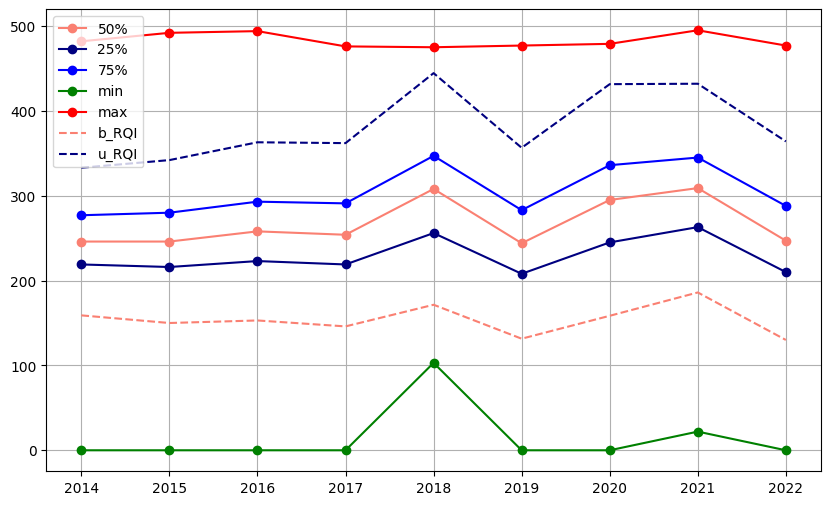

In [ ]:
df = pd.DataFrame(resumen_materias["PUNT_GLOBAL"]).T
df["inf_RQI"] =  df["50%"] - 1.5 * (df["75%"] - df["25%"])
df["sup_RQI"] =  df["50%"] + 1.5 * (df["75%"] - df["25%"])

fig, ax = plt.subplots(figsize=(10, 6))

for label, color in [("50%", "salmon"), ("25%", "navy"), ("75%", "blue"), ("min", "green"), ("max", "red")]:
    ax.plot(df.index, 
            df.loc[:,label],
            marker="o",
            color=color,
            label=label,
            )

for label, color in [("b_RQI", "salmon"), ("u_RQI", "navy")]:
    ax.plot(df.index, 
            df.loc[:,label],
            linestyle="--",
            color=color,
            label=label,
            )


plt.legend()
plt.grid()
plt.show()

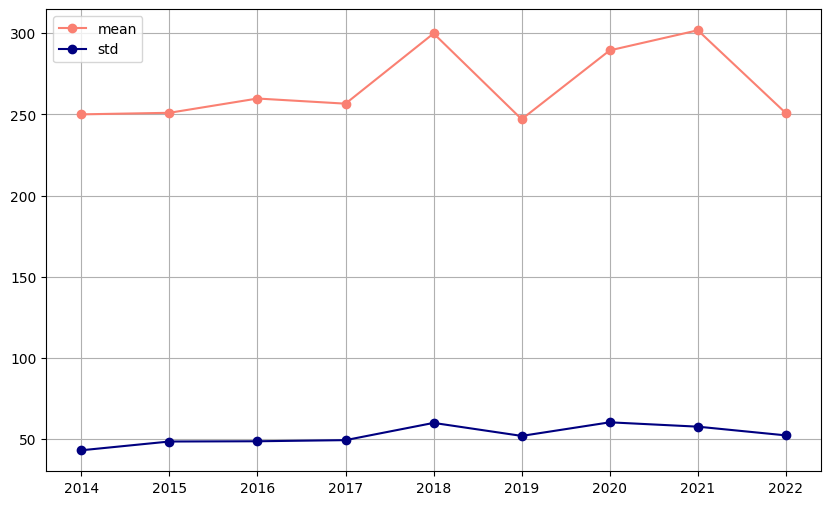

In [ ]:
df = pd.DataFrame(resumen_materias["PUNT_GLOBAL"])

fig, ax = plt.subplots(figsize=(10, 6))

for label, color in [("mean", "salmon"), ("std", "navy")]:
    ax.plot(df.columns, 
            df.loc[label],
            marker="o",
            color=color,
            label=label,
            )

plt.legend()
plt.grid()
plt.show()

In [103]:
resumen["PUNT_GLOBAL"]

count   570464.00
mean       250.98
std         48.47
min          0.00
25%        216.00
50%        246.00
75%        280.00
max        492.00
Name: PUNT_GLOBAL, dtype: float64

In [96]:
data[["Año", "PUNT_LECTURA_CRITICA"]].dropna().groupby("Año").mean()

,PUNT_LECTURA_CRITICA
Año,
2014,50.03
2015,49.92
2016,52.77
2017,53.40
2018,61.18
2019,52.30
2020,59.30
2021,61.46
2022,52.91


In [47]:
data[["Año", "PUNT_LECTURA_CRITICA"]].dropna().groupby("Año").apply(lambda x: np.quantile(x, 0.25))

Año
2014   50.00
2015   49.00
2016   53.00
2017   53.00
2018   62.00
2019   52.00
2020   61.00
2021   63.00
2022   53.00
dtype: float64

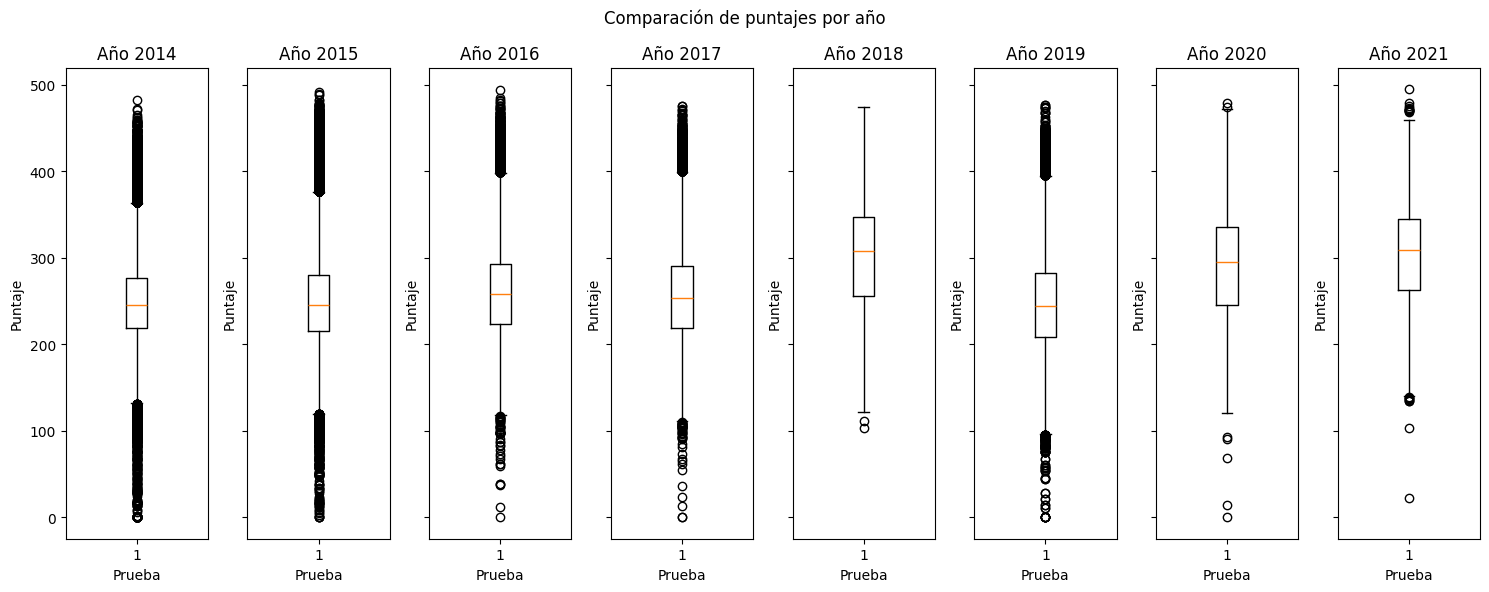

In [41]:
# Lista de años
años = range(2014, 2022)

# Crear la figura y los subgráficos
fig, axs = plt.subplots(nrows=1, ncols=len(años), figsize=(15, 6), sharey=True)

# Iterar sobre los años y crear un boxplot para cada año
for i, año in enumerate(años):
    datos_año = data.loc[data["Año"] == año, columnas].dropna()
    axs[i].boxplot(data.loc[data["Año"] == año, "PUNT_GLOBAL"].dropna())
    axs[i].set_title(f"Año {año}")
    axs[i].set_xlabel("Prueba")
    axs[i].set_ylabel("Puntaje")

# Ajustar el diseño
fig.suptitle("Comparación de puntajes por año")
fig.tight_layout()
plt.show()

In [ ]:
data["PERIODO"].unique() 

In [ ]:
data = data.sort_values(by="PERIODO")

In [ ]:
data.head()

In [ ]:
data["YEAR"] = data["PERIODO"].str[:4]

In [ ]:
data.loc[data["PERIODO"].str[-1] == "4", "PERIODO"].unique()

In [ ]:
data.loc[data["PERIODO"].str[-1] == "4", "PERIODO"].shape

In [ ]:
count_year = data["YEAR"].value_counts().sort_index().reset_index()
count_year

In [ ]:
count_periodo = data["PERIODO"].value_counts().sort_index().reset_index()
count_periodo

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(count_periodo["PERIODO"], count_periodo["count"], marker="o")
ax.set_title("Número de registros por periodo")
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(count_year["YEAR"], count_year["count"], marker="o")
ax.set_title("Número de registros por year")
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(count_year.loc[count_year["YEAR"].astype(int) >= 2018 , "YEAR"], count_year["count"], marker="o")
ax.set_title("Número de registros por year")
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(saber11["PERIODO"], 
        color="skyblue",
        # bins=10,
        width=1)
ax.set_title("Distribución de los periodos")
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.hist(data["PERIODO"], bins=10)
fig.tight_layout()
plt.show()

In [ ]:
sns.displot(data, x="PERIODO")

In [ ]:
data.columns

In [ ]:
# Separet columns by information
cole_cols = [col for col in data.columns if "cole" in col.lower() and not "cod" in col.lower()]
estu_cols = [col for col in data.columns if "estu" in col.lower() and not "cod" in col.lower()]
fami_cols = [col for col in data.columns if "fami" in col.lower() and not "cod" in col.lower()]
punt_cols = [col for col in data.columns if "punt" in col.lower() and not "cod" in col.lower()]
ing_cols = [col for col in data.columns if "ingles" in col.lower() and not "cod" in col.lower()]
cods_cols = [col for col in data.columns if "cod" in col.lower()]

In [ ]:
cods_cols

## D

In [ ]:
data[punt_cols].describe()

## By cole

In [ ]:
data[cole_cols + punt_cols].head()

In [ ]:
cole_cols

In [ ]:
data[cole_cols].sample(10)

In [ ]:
data["COLE_JORNADA"].info()

In [ ]:
data.head()